In [5]:
import numpy as np

In [6]:
def momentum_gradient_descent(initial_weighting_vector, in_data,oit_data, dw_min=1e-3, steps=1000, learning_rate=0.05):
    """

    :param initial_weighting_vector: a vector of the form [b, w] where b is the bias and w is history weighing
    :param data: numpy array with N choices in {-1,1}
    :param steps:
    :param learning_rate:
    :return:
    """

    grad_w = []
    
    ones_row = np.ones((1, in_data.shape[1]))
    in_data = np.concatenate((ones_row, in_data), axis=0)
    
    x_pre = in_data
    x_target = out_data

    dw_prev = 1e9
    w = initial_weighting_vector  # initialize descent
    gamma = 0.5
    v = np.zeros((len(initial_weighting_vector),))
    for i in range(1, steps+1):
        dw = np.dot(x_pre, ((x_target + 1) / 2 - sigmoid(w, x_pre)))
        v = gamma*v + learning_rate*dw
        w += v
        
        grad_w.append(dw)
        if np.linalg.norm(dw) < dw_min:
            break
        if np.linalg.norm(dw) > np.linalg.norm(dw_prev):
            learning_rate /= 2
        dw_prev = dw
                
    return w, grad_w

In [7]:
def regularized_momentum_gradient_descent(initial_weighting_vector, in_data, out_data, dw_min=1e-3, steps=1000,
                                          learning_rate=0.05, lamb=0.1):
    """

    :param initial_weighting_vector: a vector of the form [b, w] where b is the bias and w is history weighing
    :param in_data:
    :param out_data:
    :param dw_min: convergence criterion
    :param steps:
    :param learning_rate:
    :param lamb: regularizer
    :return:
    """
    grad_w = []

    ones_row = np.ones((1, in_data.shape[1]))
    in_data = np.concatenate((ones_row, in_data), axis=0)
    
    x_pre = in_data
    x_target = out_data

    dw_prev = 1e9
    w = initial_weighting_vector  # initialize descent
    gamma = 0.5
    v = np.zeros((len(initial_weighting_vector),))
    for i in range(1, steps + 1):
        
        regul = lamb*np.sign(w)
        regul[0] = 0
        
        dw = np.dot(x_pre, ((x_target + 1) / 2 - sigmoid(w, x_pre))) + regul
        v = gamma * v + learning_rate * dw
        w += v

        grad_w.append(dw)
        if np.linalg.norm(dw) < dw_min:
            break
        if np.linalg.norm(dw) > np.linalg.norm(dw_prev):
            learning_rate /= 2
        dw_prev = dw

    return w, grad_w


In [8]:
from training_data import generate_stationary_agent_choices,sigmoid
from outguesser import separate_choices_sequences_into_history_and_choice

nb_trials = 250
w_gen = np.zeros((4,))
w_gen[0] = 0.4
w_gen[1] = 0.4
w_gen[2] = -0.7
w_gen[3] = 1
initial_choices = np.ones((1,))

data = generate_stationary_agent_choices(nb_trials, w_gen, initial_choices)

in_data, out_data = separate_choices_sequences_into_history_and_choice(data, 14)

w_gd, dw_gd = regularized_momentum_gradient_descent(np.zeros((15,)),in_data,out_data, 1e-4, 1000, 0.05, 0.2)


w_momd, dw_momd = momentum_gradient_descent(np.zeros((15,)),in_data,out_data, 1e-4, 1000, 0.05)


In [9]:
w_gen

array([ 0.4,  0.4, -0.7,  1. ])

In [10]:
w_gd

array([ 0.5322974 ,  0.60405839, -0.70220678,  0.03413598,  0.27894242,
       -0.24839969,  0.09274482, -0.00391888,  0.06892287, -0.06883584,
       -0.03640932,  0.32094739, -0.20534856,  0.1440259 , -0.1587629 ])

In [11]:
w_momd

array([ 0.53011481,  0.59032405, -0.68891526,  0.02354332,  0.2727363 ,
       -0.23666802,  0.07706822,  0.01071781,  0.05732157, -0.06196812,
       -0.02913739,  0.30819218, -0.18823417,  0.12936988, -0.14740937])

In [12]:
np.sum(data==1)

155

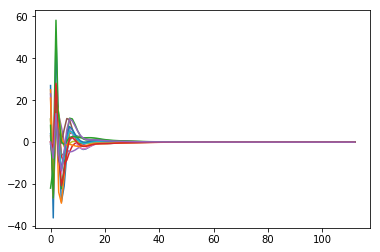

In [13]:
import matplotlib.pyplot as plt

plt.plot(dw_gd)
plt.show()

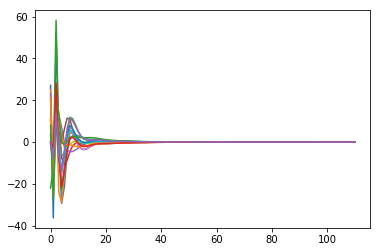

In [14]:
import matplotlib.pyplot as plt

plt.plot(dw_momd)
plt.show()